Assignment 6: Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature

The mean temperature each day

The mean temperature for each month 

60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column) 

The rolling windspeed (say over 24 hours) 

The max windspeed for each day 

The monthly mean of the daily max windspeeds (yer I am being nasty here) 

You do not need to over comment your code. Marks will be given for how nice the plots are.

In [142]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data.
# add skiprows to skip the metadata at the top of the file.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=23)

# Inspect the data.
df.head(5)


C:\Users\laura\AppData\Local\Temp\ipykernel_9020\1062867092.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


When looking at the excel file of the downloaded data set. The meta data at the top is a key for each column and what data it represents. For this assignment, we are looking at the column "temp" for Air Temperature.



date:  -  Date and Time (utc)

rain:  -  Precipitation Amount (mm)	

temp: -  Air Temperature (C)	

wetb:  -  Wet Bulb Temperature (C)		

dewpt: -  Dew Point Temperature (C)       

rhum:  -  Relative Humidity (%)			

vappr: -  Vapour Pressure (hPa)	 	

msl:   -  Mean Sea Level Pressure (hPa)	

wdsp:  -  Mean Wind Speed (knot)			

wddir: -  Predominant Wind Direction (degree)		

ww:    -  Synop code for Present Weather	

w:     -  Synop code for Past Weather	

sun:   -  Sunshine duration (hours)		

vis:   -  Visibility (m)		

clht:  -  Cloud height (100's of ft) - 999 if none 	

clamt: -  Cloud amount	

ind:   -  Indicator			


In [143]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set(style="whitegrid")
# Load data (no year filtering; full range)
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# skip the metadata at the top
df = pd.read_csv(url, skiprows=23)

C:\Users\laura\AppData\Local\Temp\ipykernel_9020\3175511412.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


Using pd.to_datetime() to convert strings into datetime objects, which Python can understand and use for plotting or resampling. Resampling further down to help manage plotting with the large data sample we are working with.


,errors='coerce') ensures that any value that cannot be parsed is set to NaN instead of crashing the program.

[Pandas Datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

dropna(subset=['date'])  will remove any rows where the date could not be converted, so we only keep valid observations.

[Pandas Dropna](https://www.geeksforgeeks.org/python/python-pandas-dataframe-dropna/)


In [144]:
# Parse datetime and set index.

# The file usually has a 'date' column like 'DD-MMM-YYYY HH:MM'. Use dayfirst and coerce errors to catch parsing issues.
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
# drop rows where date failed to parse

df = df.dropna(subset=['date']).copy()
# set index
df = df.set_index('date').sort_index()

print('\nDate range:', df.index.min(), 'to', df.index.max())

C:\Users\laura\AppData\Local\Temp\ipykernel_9020\1603411697.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')



Date range: 1996-04-10 14:00:00 to 2025-12-01 00:00:00


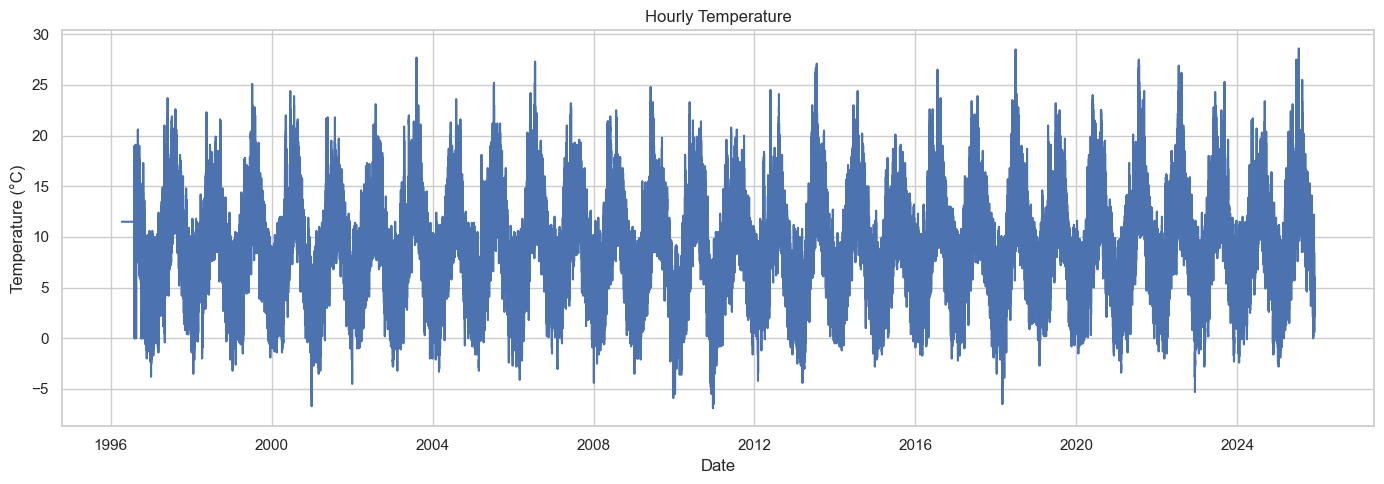

In [145]:
# Hourly Temperature plot 
if 'temp' not in df.columns:
    raise ValueError("No 'temp' column found in the data. Check column names printed above.")

plt.figure(figsize=(14,5))
ax = sns.lineplot(data=df, x=df.index, y='temp')
ax.set_title('Hourly Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


Daily mean sample:
date
1996-04-10    11.5
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
Freq: D, Name: temp, dtype: float64


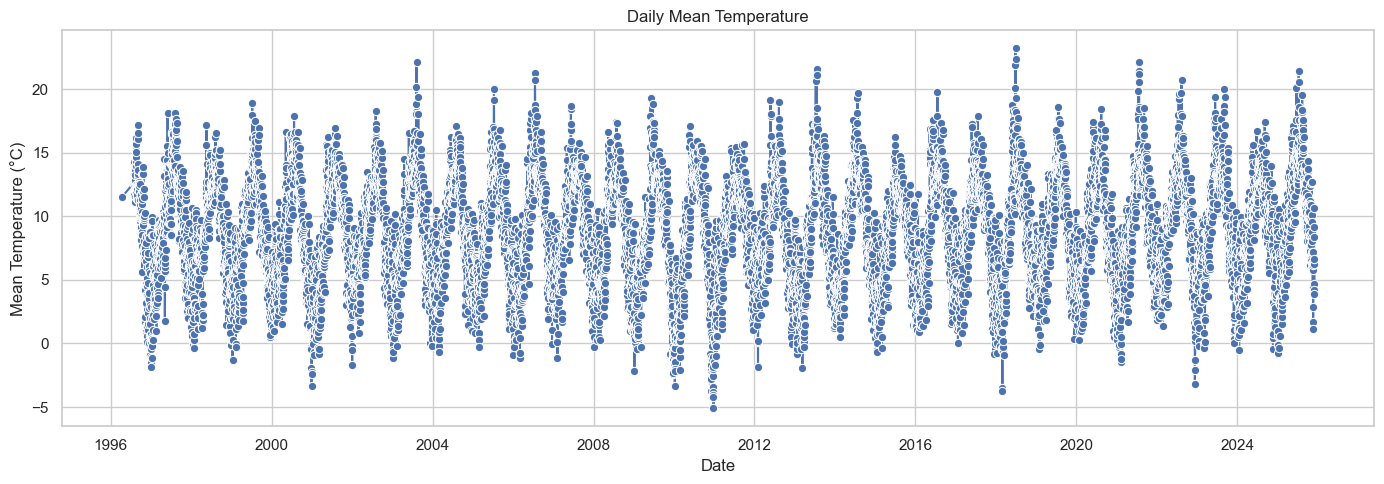

In [146]:
# Daily mean temperature 
daily_mean = df['temp'].resample('D').mean()
print('\nDaily mean sample:')
print(daily_mean.head())

# Visualise 
plt.figure(figsize=(14,5))
ax = sns.lineplot(x=daily_mean.index, y=daily_mean.values, marker='o')
ax.set_title('Daily Mean Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature (°C)')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


Monthly mean sample:
date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
Freq: ME, Name: temp, dtype: float64


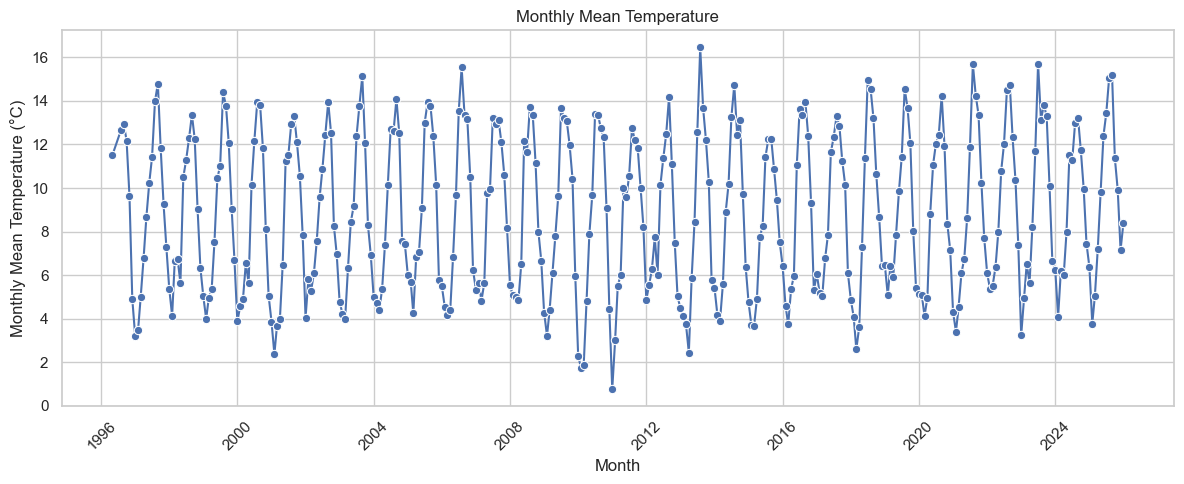

In [147]:
# Monthly mean temperature.
monthly_mean = df['temp'].resample('ME').mean()
print('\nMonthly mean sample:')
print(monthly_mean.head())


plt.figure(figsize=(12,5))
ax = sns.lineplot(x=monthly_mean.index, y=monthly_mean.values, marker='o')
ax.set_title('Monthly Mean Temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Mean Temperature (°C)')

# rotate labels for better fit.
# See: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.xticks(rotation=45)   
plt.tight_layout()
plt.show()

Part 2: Windspeed Section

In [148]:
# Print all column names to find which one reflects windspeed
print("Columns in the dataset:")
print(df.columns)

# After checking the columns outputted, manually set the windspeed column name.
wcol = 'wdsp'   

print("Using windspeed column:", wcol)

# Convert windspeed column to numeric.
# see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html 
df[wcol] = pd.to_numeric(
    df[wcol].astype(str).str.replace(',', '.', regex=False), # replace commas with dots
    errors='coerce'
)


Columns in the dataset:
Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')
Using windspeed column: wdsp


[set_major_formatter Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html)

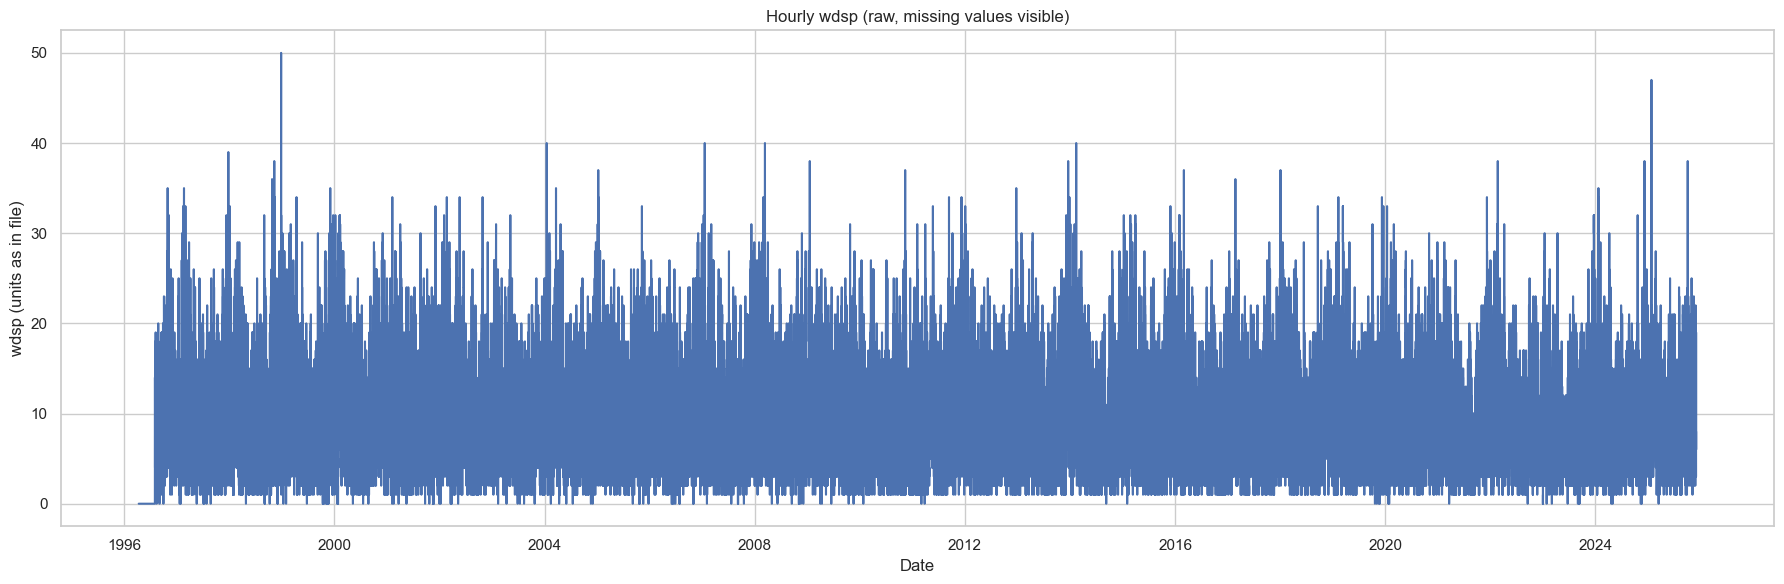

In [149]:
# Plot hourly windspeed - raw data missing values visible
plt.figure(figsize=(18,6))
ax = sns.lineplot(x=df.index, y=df[wcol])
ax.set_title(f'Hourly {wcol} (raw, missing values visible)')
ax.set_xlabel('Date')
ax.set_ylabel(f'{wcol} (units as in file)')

# Format x-axis dates using matplotlib.dates.
# See: https://matplotlib.org/stable/api/dates_api.html
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# mdatees.concise date formatter to clean up the lables.
# See: https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.ConciseDateFormatter
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


See [Supporting Documentation](https://palospublishing.com/how-to-visualize-and-analyze-data-changes-with-rolling-window-methods/#:~:text=A%20rolling%20window%20involves%20selecting%20a%20fixed-size%20subset,new%20series%20that%20reflects%20local%20statistics%20or%20transformations.) on Rolling Averages/Means for reference.

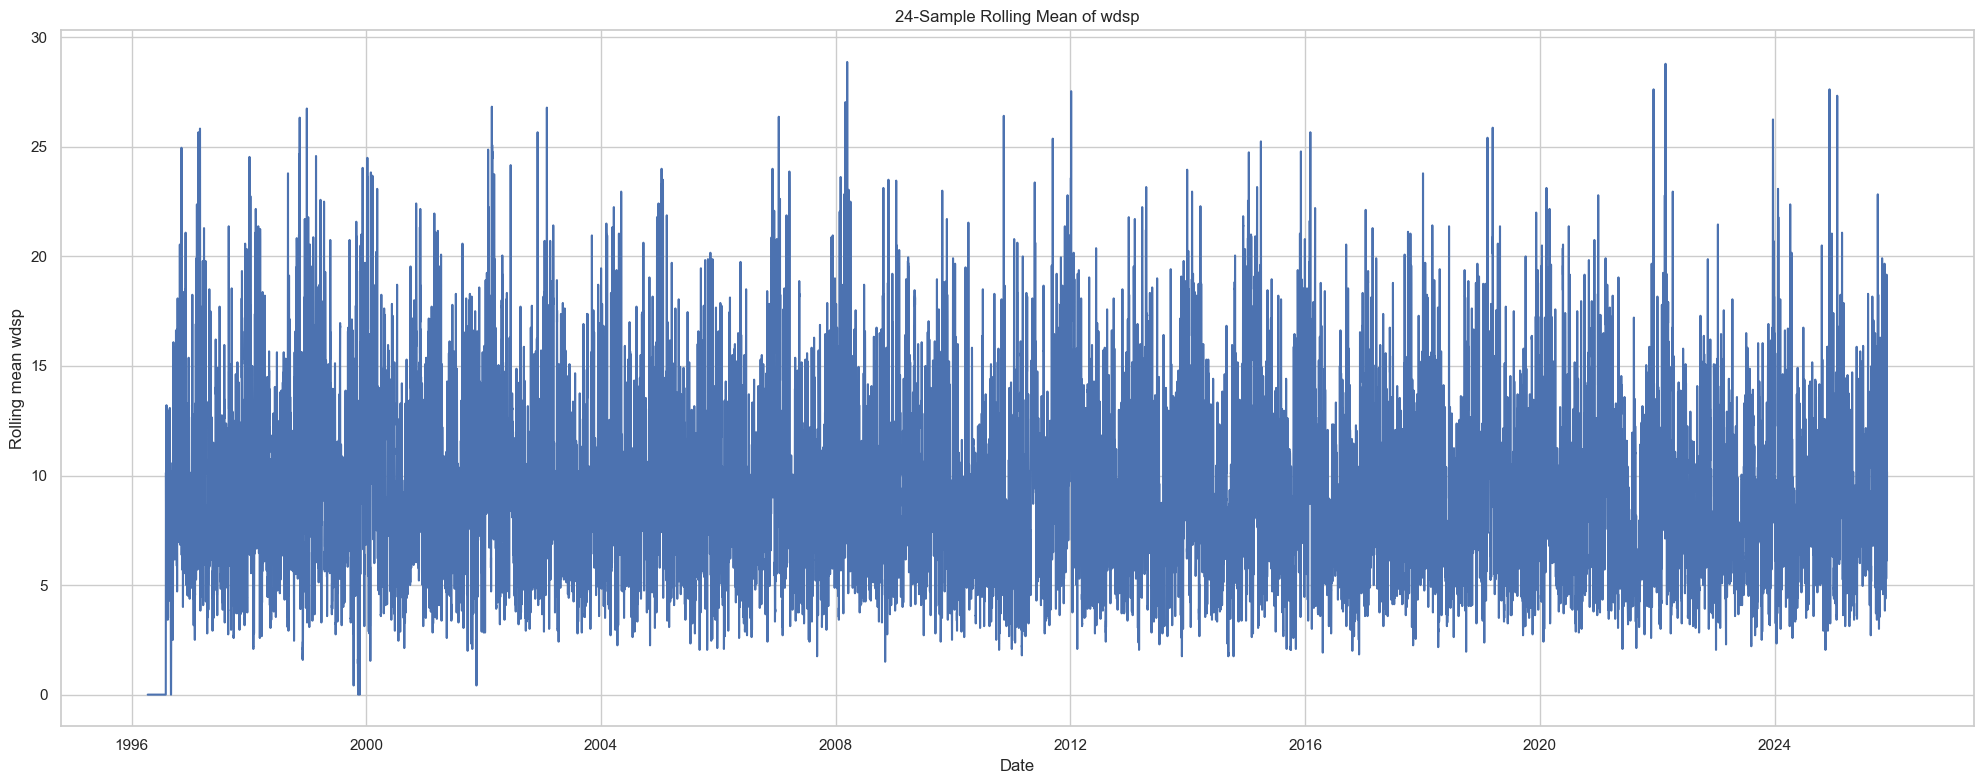

In [150]:
# Rolling windspeed or the 24-hour rolling average of the windspeeds.
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
rolling_window = 24
rolling_wind = df[wcol].rolling(window=rolling_window, min_periods=1).mean()


# Plot figgure. 
plt.figure(figsize=(20,8))
ax = sns.lineplot(x=rolling_wind.index, y=rolling_wind.values,)
ax.set_title(f'{rolling_window}-Sample Rolling Mean of {wcol}')
ax.set_xlabel('Date')
ax.set_ylabel(f'Rolling mean {wcol}')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


Daily max wind sample:
date
1996-04-10    0.0
1996-04-11    NaN
1996-04-12    NaN
1996-04-13    NaN
1996-04-14    NaN
Freq: D, Name: wdsp, dtype: float64


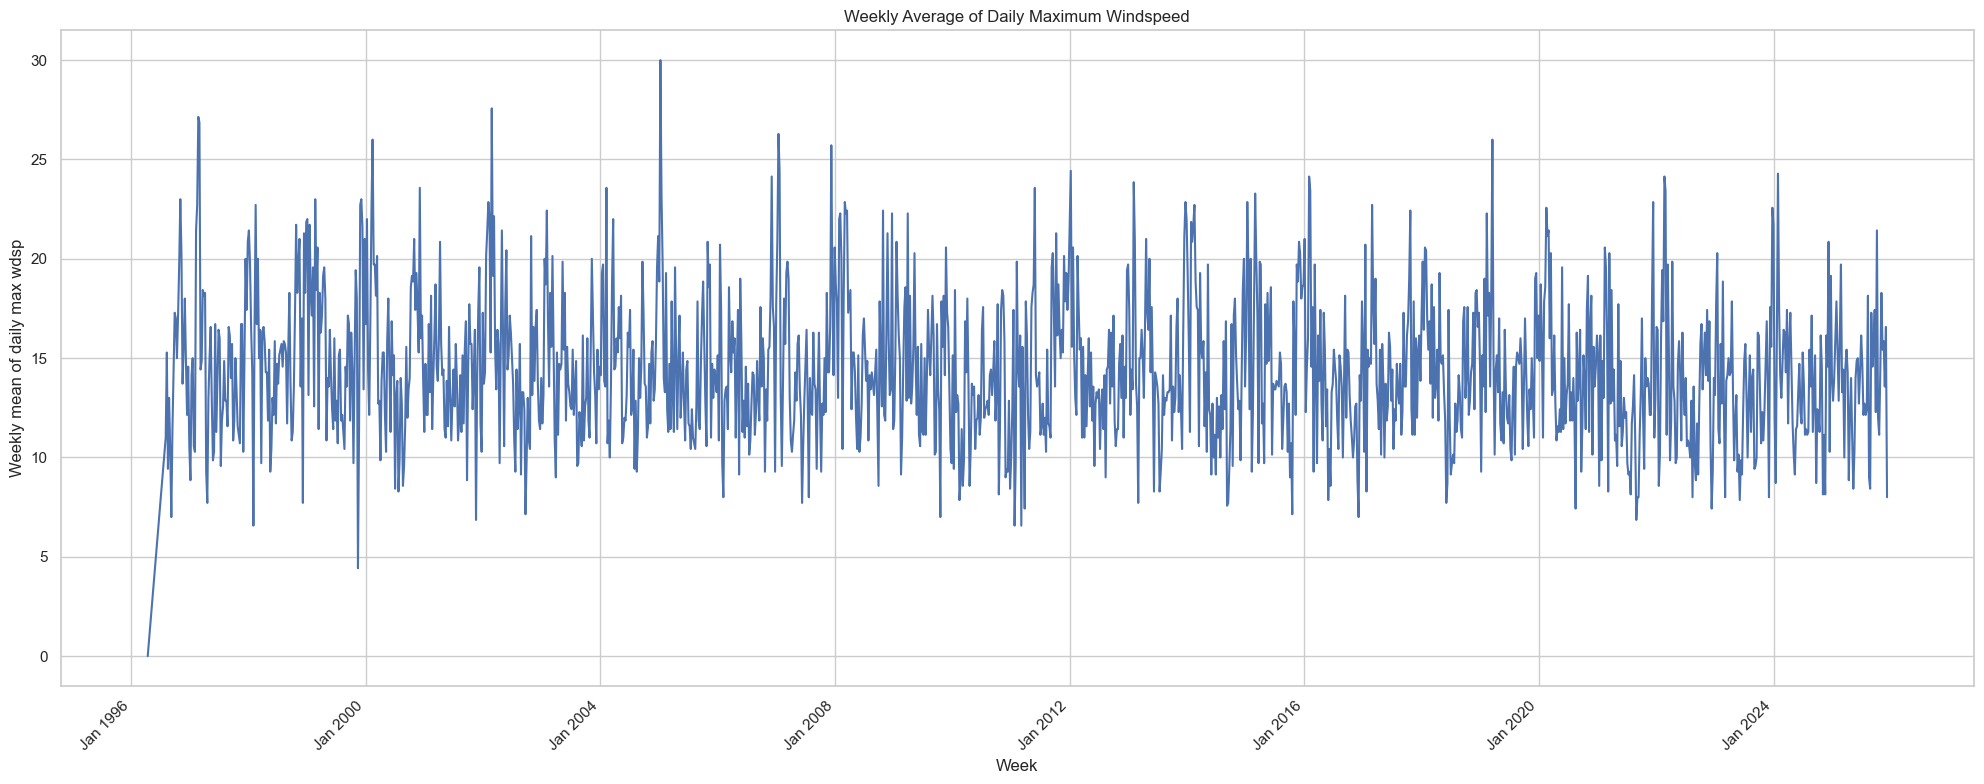

In [151]:
# Daily max windspeed.
daily_max_wind = df[wcol].resample('D').max()
print('\nDaily max wind sample:')
print(daily_max_wind.head())


# Resample daily max windspeed to weekly average.
weekly_max_wind = daily_max_wind.resample('W').mean()

plt.figure(figsize=(20,8))
ax = sns.lineplot(x=weekly_max_wind.index, y=weekly_max_wind.values)
ax.set_title('Weekly Average of Daily Maximum Windspeed')
ax.set_xlabel('Week')
ax.set_ylabel(f'Weekly mean of daily max {wcol}')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Resampled the data to look at the quarterly mean of the daily max speed to fit better in the plot. 

C:\Users\laura\AppData\Local\Temp\ipykernel_9020\514005674.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_daily_max = daily_max_wind.resample('M').mean()
C:\Users\laura\AppData\Local\Temp\ipykernel_9020\514005674.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_mean_daily_max = daily_max_wind.resample('Q').mean()



Monthly mean of daily max windspeeds:
date
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
Freq: ME, Name: wdsp, dtype: float64


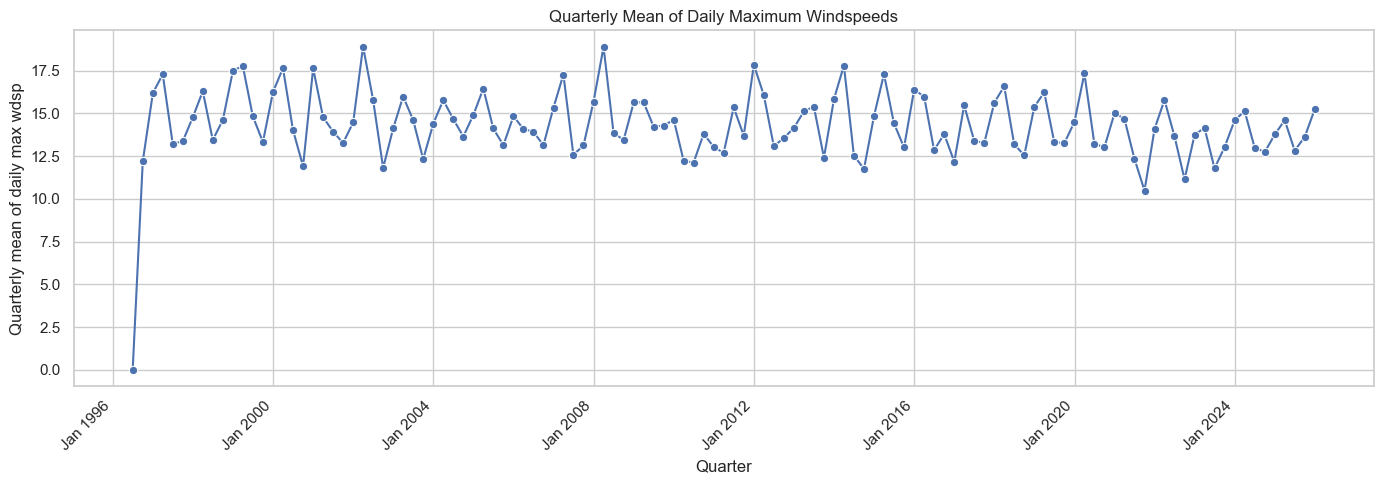

In [152]:
# Monthly mean of daily max windspeeds
monthly_mean_daily_max = daily_max_wind.resample('M').mean()
print('\nMonthly mean of daily max windspeeds:')
print(monthly_mean_daily_max.head())


# Resample to quarterly mean of daily max windspeeds.
quarterly_mean_daily_max = daily_max_wind.resample('Q').mean()

plt.figure(figsize=(14,5))
ax = sns.lineplot(x=quarterly_mean_daily_max.index, y=quarterly_mean_daily_max.values, marker='o')
ax.set_title('Quarterly Mean of Daily Maximum Windspeeds')
ax.set_xlabel('Quarter')
ax.set_ylabel(f'Quarterly mean of daily max {wcol}')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



End